# Data Visualisation on the MovieLens Dataset

In this storytelling and visualization project, I will visualize the data and show a few metrics from the movielens data set. 

Source of data: MovieLens :: https://grouplens.org/datasets/movielens/

Let's get started!

## Import Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Enable inline plotting
%matplotlib inline

# Get the data

In [11]:
df1 = pd.read_csv('movies.csv')
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
df2 = pd.read_csv('ratings.csv')
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
df3 = pd.read_csv('tags.csv')
df3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Merge the data 
Now that we have imported all the data sets, it is time that we merge them to form a larger and wider dataset with more related features

In [14]:
df4 = pd.merge(df2,df3,on=['userId','movieId'],how='left')
df = pd.merge(df4,df1,on=['movieId'],how='left')
df.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


# Exploratory Data Analysis
Let's take a look at some of the best rated movies.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [16]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
I'm the One That I Want (2000)           5.0
Vacations in Prostokvashino (1980)       5.0
My Love (2006)                           5.0
Cherish (2002)                           5.0
Paper Birds (Pájaros de papel) (2010)    5.0
Name: rating, dtype: float64

In [17]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 484
Forrest Gump (1994)                 335
Shawshank Redemption, The (1994)    319
Silence of the Lambs, The (1991)    283
Matrix, The (1999)                  280
Name: rating, dtype: int64

In [18]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


## New 'Number of Ratings' Column

In [19]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.sort_values(['num of ratings','rating'],ascending=False).head(5)

,rating,num of ratings
title,,
Pulp Fiction (1994),4.487603,484
Forrest Gump (1994),4.155224,335
"Shawshank Redemption, The (1994)",4.432602,319
"Silence of the Lambs, The (1991)",4.173145,283
"Matrix, The (1999)",4.183929,280


# Getting more insights about the ratings
Plot the average ratings frequency

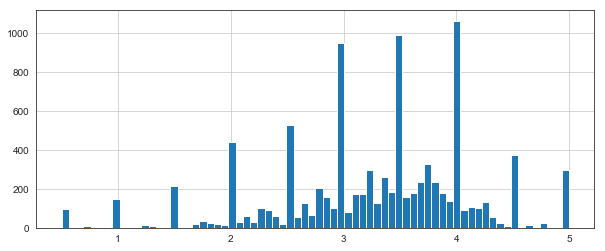

In [60]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

# Are the most popular movies the most highly rated?
# Are the most highly rated also the most popular ones?
## We can answer this by the following plt:
## Number of Ratings vs Ratings plotting

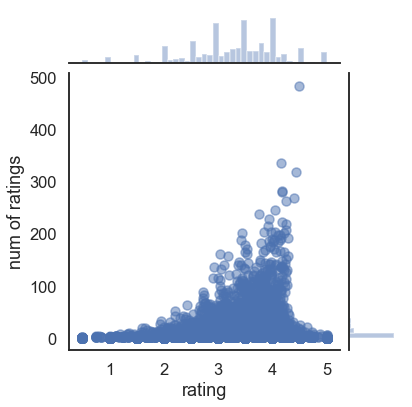

In [40]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Visualise the number of movies which belong to each genre

## STEP1: Get the frequency of the keywords from the 'genres' feature

In [28]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

##  STEP 2: Create a census of genre keywords

In [34]:
genre_labels = set()
for s in df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

## STEP 3: Counting the frequency of many times each of the genres occur: 

In [31]:
keyword_occurences, dum = count_word(df, 'genres', genre_labels)

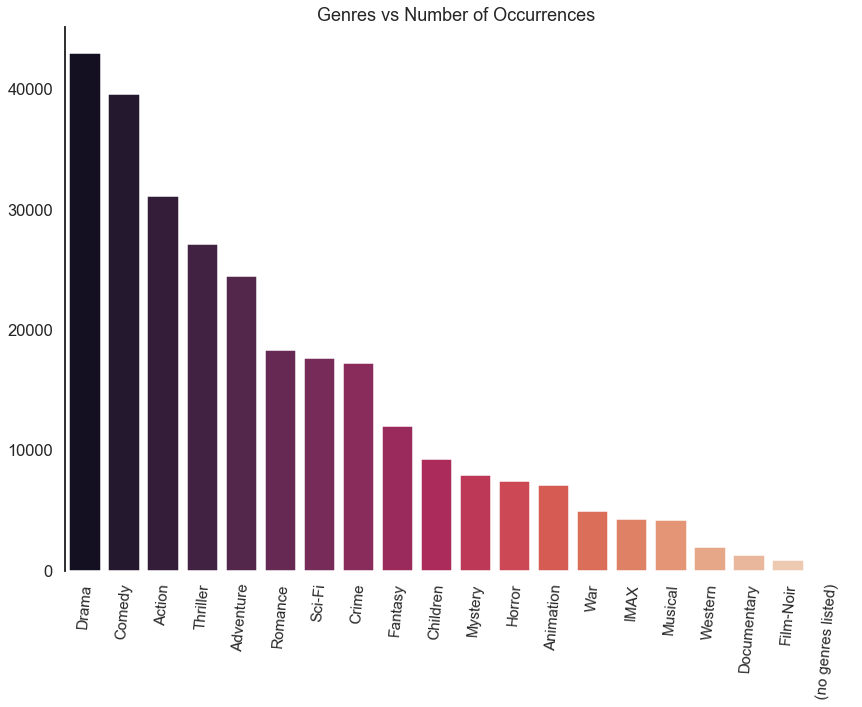

In [35]:
x_axis=[]
y_axis=[]
fig = plt.figure(1, figsize=(14,10))
plt.xticks(rotation=85, fontsize = 15)
sns.set(style="white", context="talk")
for (key,cnt) in keyword_occurences:
    x_axis.append(key)
    y_axis.append(cnt)
sns.barplot(x_axis,y_axis, palette="rocket")
plt.title("Genres vs Number of Occurrences")
sns.despine(bottom=True)

# There are 10 different ratings possible (0, .5, 1, 1.5, 2, 2.5, 3......5). Can we tell the count of each rating from dataset?

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


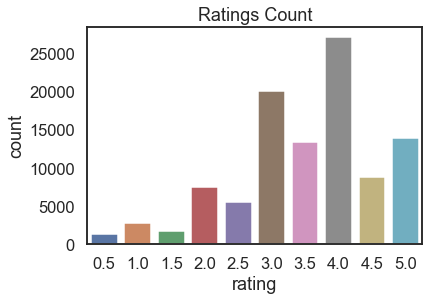

In [38]:
tempDF = df
for (key,cnt) in keyword_occurences:
    tempDF.loc[tempDF['genres'].str.contains(key), key] = 1
    tempDF[key] = tempDF[key].fillna(0)

tempDF['tag'] = tempDF['tag'].fillna('')
plt.title("Ratings Count")
sns.countplot(x=tempDF.rating,data=tempDF)

##  Plot the density estimate for ratings

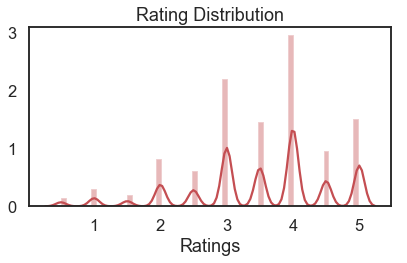

In [44]:
sns.despine(left=True)
sns.distplot(tempDF.rating, color="r")
plt.xlabel('Ratings')
plt.title('Rating Distribution')
plt.tight_layout()

# WordCloud

Word cloud is a visual representation of text data where the importance/occurence of each word is depicted by the font size.

In [56]:
# Create Text From tags
text = ''
for index, row in tempDF.iterrows():
   text = text+' '+row['tag']
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 15).generate(text) 

# Plot the WordCloud image                        

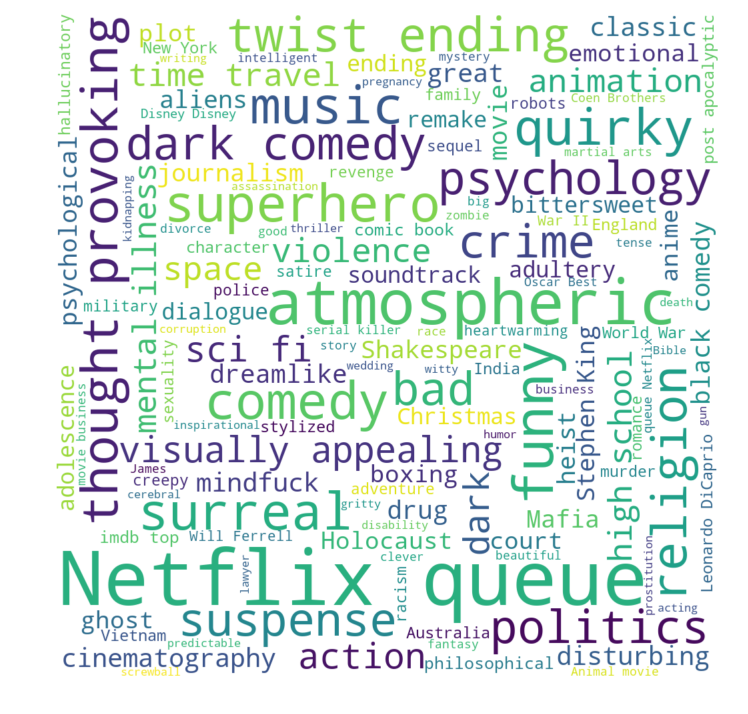

In [59]:
plt.figure(figsize = (10, 10), facecolor=None) 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

